<a href="https://colab.research.google.com/github/Mostafashimi/attendance-feb16/blob/main/happiness/happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_happiness = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/datasets/refs/heads/main/happiness/happiness.tsv")
df_happiness

,country,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2357,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2358,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2359,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2360,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [4]:
df_happiness.head()

,country,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [5]:
df_countries = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/datasets/refs/heads/main/happiness/countries.tsv")
df_countries.shape

(191, 5)

In [6]:
df_countries.head()

,country,continent,region,economic_status,political_system
0,Afghanistan,Asia,South Asia,Developing,Islamic Republic
1,Albania,Europe,Southern Europe,Developing,Parliamentary Republic
2,Algeria,Africa,Northern Africa,Developing,Presidential Republic
3,Angola,Africa,Sub-Saharan Africa,Developing,Presidential Republic
4,Argentina,South America,South America,Developing,Federal Presidential Republic


## What are the average, minimum, and maximum values of `life_ladder` (happiness scores) across all countries?

In [7]:
df_happiness["life_ladder"].min()

1.281

In [8]:
df_happiness["life_ladder"].max()

8.019

In [9]:
df_happiness["life_ladder"].mean()

np.float64(5.483699407281965)

In [10]:
df_happiness["life_ladder"].agg(["min","max","mean"])

,life_ladder
min,1.281000
max,8.019000
mean,5.483699


## How does `life_ladder` vary across different continents or regions?

In [11]:
df=pd.merge(df_happiness, df_countries, on='country')
df.head()

,country,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,region,economic_status,political_system
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Asia,South Asia,Developing,Islamic Republic
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Asia,South Asia,Developing,Islamic Republic
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Asia,South Asia,Developing,Islamic Republic
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Asia,South Asia,Developing,Islamic Republic
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Asia,South Asia,Developing,Islamic Republic


In [12]:
df.groupby('continent')["life_ladder"].mean()

,life_ladder
continent,
Africa,4.374737
Asia,5.262745
Europe,6.228639
North America,6.201966
Oceania,7.251559
South America,6.038182


## What is the range of `log_gdp_per_capita` values, and which countries have the highest and lowest GDP per capita?

In [16]:
min_gdp=df["log_gdp_per_capita"].min()
min_gdp

5.527

In [18]:
max_gdp=df["log_gdp_per_capita"].max()
max_gdp

11.676

In [21]:
df[df["log_gdp_per_capita"]==min_gdp]["country"]

,country
2138,Venezuela


In [22]:
df[df["log_gdp_per_capita"]==max_gdp]["country"]

,country
917,Ireland


## How has the `life_ladder` score changed over time in a specific country?

In [27]:
Egypt_df=df[df["country"]=="Egypt"]
Egypt_df

,country,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,region,economic_status,political_system
558,Egypt,2007,5.541,9.138,0.686,61.52,0.609,-0.126,0.825,0.600,0.355,Africa,Northern Africa,Developing,Presidential Republic
559,Egypt,2008,4.632,9.187,0.738,61.58,0.673,-0.093,0.914,0.627,0.301,Africa,Northern Africa,Developing,Presidential Republic
560,Egypt,2009,5.066,9.213,0.744,61.64,0.611,-0.105,0.801,0.549,0.339,Africa,Northern Africa,Developing,Presidential Republic
561,Egypt,2010,4.669,9.243,0.769,61.70,0.486,-0.081,0.826,0.491,0.276,Africa,Northern Africa,Developing,Presidential Republic
562,Egypt,2011,4.174,9.239,0.753,61.76,0.590,-0.157,0.859,0.456,0.353,Africa,Northern Africa,Developing,Presidential Republic
563,Egypt,2012,4.204,9.238,0.737,61.82,0.452,-0.143,0.880,0.458,0.398,Africa,Northern Africa,Developing,Presidential Republic
564,Egypt,2013,3.559,9.236,0.675,61.88,0.474,-0.147,0.913,0.487,0.483,Africa,Northern Africa,Developing,Presidential Republic
565,Egypt,2014,4.885,9.242,0.619,61.94,0.578,-0.132,0.749,0.477,0.327,Africa,Northern Africa,Developing,Presidential Republic
566,Egypt,2015,4.763,9.262,0.730,62.00,0.659,-0.094,0.684,0.554,0.344,Africa,Northern Africa,Developing,Presidential Republic
567,Egypt,2016,4.557,9.284,0.809,62.25,0.656,-0.147,0.818,0.538,0.370,Africa,Northern Africa,Developing,Presidential Republic


<Axes: xlabel='year', ylabel='life_ladder'>

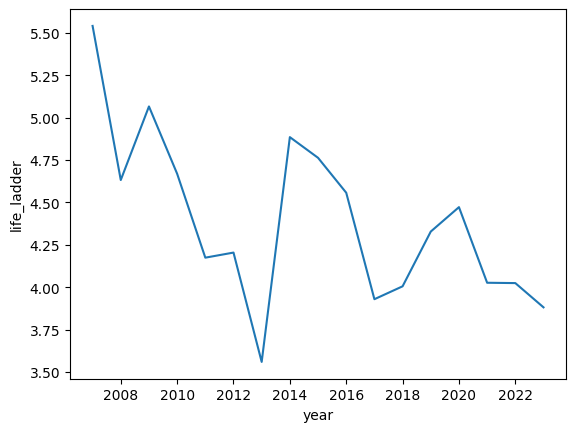

In [30]:
sns.lineplot(data=Egypt_df, x="year",y="life_ladder")

## Which countries have seen the largest increase or decrease in happiness scores over the years?

In [34]:
range_df=df.groupby("country")["life_ladder"].agg(['min','max']).reset_index()
range_df

,country,min,max
0,Afghanistan,1.281,4.758
1,Albania,4.511,5.867
2,Algeria,4.745,6.355
3,Angola,3.795,5.589
4,Argentina,5.793,6.776
...,...,...,...
149,Venezuela,4.041,7.478
150,Vietnam,5.023,6.325
151,Yemen,2.983,4.809
152,Zambia,3.082,5.260


In [36]:
range_df["range"]=range_df["max"]-range_df["min"]
range_df

,country,min,max,range
0,Afghanistan,1.281,4.758,3.477
1,Albania,4.511,5.867,1.356
2,Algeria,4.745,6.355,1.610
3,Angola,3.795,5.589,1.794
4,Argentina,5.793,6.776,0.983
...,...,...,...,...
149,Venezuela,4.041,7.478,3.437
150,Vietnam,5.023,6.325,1.302
151,Yemen,2.983,4.809,1.826
152,Zambia,3.082,5.260,2.178


In [38]:
range_df.sort_values("range", ascending=False)

,country,min,max,range
0,Afghanistan,1.281,4.758,3.477
149,Venezuela,4.041,7.478,3.437
77,Lebanon,2.179,5.491,3.312
134,Syria,2.688,5.323,2.635
14,Benin,3.193,5.820,2.627
...,...,...,...,...
34,Cuba,5.418,5.418,0.000
86,Maldives,5.198,5.198,0.000
55,Guyana,5.993,5.993,0.000
106,Oman,6.853,6.853,0.000


## Are there noticeable trends in `healthy_life_expectancy_at_birth` over time across regions or continents?

## What is the relationship between `log_gdp_per_capita` and `life_ladder`? Do countries with higher GDP per capita tend to have higher happiness scores?

## How does `social_support` correlate with `life_ladder`? Do countries with higher social support report higher happiness?

## Is there a relationship between `freedom_to_make_life_choices` and `life_ladder`?

## How do `positive_affect` and `negative_affect` differ across countries? Are there countries with high positive affect and low negative affect, or vice versa?

## Is there a correlation between `life_ladder` and `positive_affect`? What about `life_ladder` and `negative_affect`?

## Does `perceptions_of_corruption` influence `life_ladder`? Do countries with lower perceived corruption have higher happiness scores?

## How does the `generosity` measure correlate with `log_gdp_per_capita`? Are wealthier countries generally more or less generous?

## How do different regions or continents compare in terms of `life_ladder`, `social_support`, and `freedom_to_make_life_choices`?

## Are there differences in `healthy_life_expectancy_at_birth` between countries in different economic classifications?

## Create a time-series chart showing `life_ladder` over time for a selected group of countries.

In [52]:
years=df.groupby(["continent","year"])["life_ladder"].mean().reset_index()
years

,continent,year,life_ladder
0,Africa,2006,4.074182
1,Africa,2007,4.435857
2,Africa,2008,4.314615
3,Africa,2009,4.425409
4,Africa,2010,4.322760
...,...,...,...
107,South America,2019,5.964500
108,South America,2020,5.616300
109,South America,2021,5.752800
110,South America,2022,6.129100


<Axes: xlabel='year', ylabel='life_ladder'>

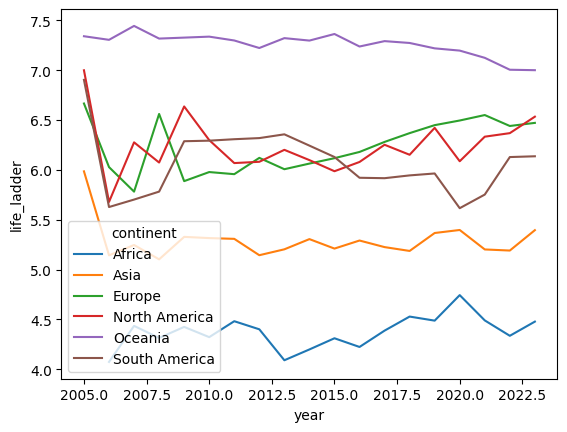

In [57]:
sns.lineplot(data=years, x="year",y="life_ladder", hue="continent")

## Use scatter plots to explore relationships between `log_gdp_per_capita` and `life_ladder`, color-coded by continent or region.